In [25]:
#install.packages('randomForest')
library(readxl)
library(randomForest)
library(readxl)
library(tidyverse)
#install.packages('dplyr')
library(dplyr)
#install.packages('caret')
library(Rcpp)
library(caret)
library(rpart)
#install.packages('tree')
library(tree)
#install.packages('multcomp')
library(multcomp)
#install.packages('party')
library(party)
library(tree)


# Classification

In [126]:
df.wa = read_excel( "C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/df-water-access.xlsx" ,sheet=1)
df.explore =read_excel("C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/df-water-explore.xlsx" ,sheet=1)
df.cluster = read_excel("C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/dfcluster-rank.xlsx" ,sheet=1)
df.wb = read_excel("C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/df-wb.xlsx" ,sheet=1 )
df.explore$clusters <- as.numeric(df.cluster$clusters)

Matching country from world bank and data frame df.explore

In [127]:
df.explore$Country
df.wb$Country

setdiff(df.explore$Country, df.wb$Country)

[1] "Afghanistan"               "Albania"                  
 [3] "Angola"                    "Armenia"                  
 [5] "Azerbaijan"                "Bangladesh"               
 [7] "Benin"                     "Bolivia"                  
 [9] "Brazil"                    "Burkina Faso"             
[11] "Burundi"                   "Cambodia"                 
[13] "Cameroon"                  "Central African Republic" 
[15] "Chad"                      "Colombia"                 
[17] "Comoros"                   "Congo"                    
[19] "Congo Democratic Republic" "Cote d'Ivoire"            
[21] "Dominican Republic"        "Egypt"                    
[23] "Eritrea"                   "Eswatini"                 
[25] "Ethiopia"                  "Gabon"                    
[27] "Gambia"                    "Ghana"                    
[29] "Guatemala"                 "Guinea"                   
[31] "Guyana"                    "Haiti"                    
[33] "Honduras"                  "India"                    
[35] "Indonesia"                 "Jordan"                   
[37] "Kazakhstan"                "Kenya"                    
[39] "Kyrgyz Republic"           "Lesotho"                  
[41] "Liberia"                   "Madagascar"               
[43] "Malawi"                    "Maldives"                 
[45] "Mali"                      "Mauritania"               
[47] "Moldova"                   "Morocco"                  
[49] "Mozambique"                "Myanmar"                  
[51] "Namibia"                   "Nepal"                    
[53] "Nicaragua"                 "Niger"                    
[55] "Nigeria"                   "Pakistan"                 
[57] "Papua New Guinea"          "Paraguay"                 
[59] "Peru"                      "Philippines"              
[61] "Rwanda"                    "Sao Tome and Principe"    
[63] "Senegal"                   "Sierra Leone"             
[65] "South Africa"              "Tajikistan"               
[67] "Tanzania"                  "Timor-Leste"              
[69] "Togo"                      "Turkey"                   
[71] "Turkmenistan"              "Uganda"                   
[73] "Ukraine"                   "Uzbekistan"               
[75] "Vietnam"                   "Yemen"                    
[77] "Zambia"                    "Zimbabwe"

[1] "Afghanistan"                    "Albania"                       
  [3] "Algeria"                        "American Samoa"                
  [5] "Andorra"                        "Angola"                        
  [7] "Antigua and Barbuda"            "Argentina"                     
  [9] "Armenia"                        "Aruba"                         
 [11] "Australia"                      "Austria"                       
 [13] "Azerbaijan"                     "Bahamas, The"                  
 [15] "Bahrain"                        "Bangladesh"                    
 [17] "Barbados"                       "Belarus"                       
 [19] "Belgium"                        "Belize"                        
 [21] "Benin"                          "Bermuda"                       
 [23] "Bhutan"                         "Bolivia"                       
 [25] "Bosnia and Herzegovina"         "Botswana"                      
 [27] "Brazil"                         "British Virgin Islands"        
 [29] "Brunei Darussalam"              "Bulgaria"                      
 [31] "Burkina Faso"                   "Burundi"                       
 [33] "Cabo Verde"                     "Cambodia"                      
 [35] "Cameroon"                       "Canada"                        
 [37] "Cayman Islands"                 "Central African Republic"      
 [39] "Chad"                           "Channel Islands"               
 [41] "Chile"                          "China"                         
 [43] "Colombia"                       "Comoros"                       
 [45] "Congo, Dem. Rep."               "Congo, Rep."                   
 [47] "Costa Rica"                     "Cote d'Ivoire"                 
 [49] "Croatia"                        "Cuba"                          
 [51] "Curacao"                        "Cyprus"                        
 [53] "Czech Republic"                 "Denmark"                       
 [55] "Djibouti"                       "Dominica"                      
 [57] "Dominican Republic"             "Ecuador"                       
 [59] "Egypt, Arab Rep."               "El Salvador"                   
 [61] "Equatorial Guinea"              "Eritrea"                       
 [63] "Estonia"                        "Eswatini"                      
 [65] "Ethiopia"                       "Faroe Islands"                 
 [67] "Fiji"                           "Finland"                       
 [69] "France"                         "French Polynesia"              
 [71] "Gabon"                          "Gambia, The"                   
 [73] "Georgia"                        "Germany"                       
 [75] "Ghana"                          "Gibraltar"                     
 [77] "Greece"                         "Greenland"                     
 [79] "Grenada"                        "Guam"                          
 [81] "Guatemala"                      "Guinea"                        
 [83] "Guinea-Bissau"                  "Guyana"                        
 [85] "Haiti"                          "Honduras"                      
 [87] "Hong Kong SAR, China"           "Hungary"                       
 [89] "Iceland"                        "India"                         
 [91] "Indonesia"                      "Iran, Islamic Rep."            
 [93] "Iraq"                           "Ireland"                       
 [95] "Isle of Man"                    "Israel"                        
 [97] "Italy"                          "Jamaica"                       
 [99] "Japan"                          "Jordan"                        
[101] "Kazakhstan"                     "Kenya"                         
[103] "Kiribati"                       "Korea, Dem. People’s Rep."     
[105] "Korea, Rep."                    "Kosovo"                        
[107] "Kuwait"                         "Kyrgyz Republic"               
[109] "Lao PDR"                        "Latvia"                        
[111] "Lebanon"                        "Le

[1] "Congo"                     "Congo Democratic Republic"
[3] "Egypt"                     "Gambia"                   
[5] "Namibia"                   "Yemen"

In [141]:
# Correct the country names in DF

df.wb [df.wb =='namibia'] = "Namibia"
df.wb [df.wb =='Yemen, Rep.'] = "Yemen" 
df.wb [df.wb =='Gambia, The'] = "Gambia"
df.wb [df.wb =='Egypt, Arab Rep'] = "Egypt"
df.wb [df.wb =='Congo, Dem. Rep'] = "Congo Democratic Republic"
df.wb [df.wb =='Congo, Rep'] = "Congo"


matching other exploatory data into the the data frame

In [142]:
df.exp <- merge(x = df.explore,
              y = df.wb,
              by = c("Country"))


df.exp <- df.exp[, c(1:8,12:19) ]
df.exp$Country
summary(df.exp)

[1] "Afghanistan"               "Albania"                  
 [3] "Angola"                    "Armenia"                  
 [5] "Azerbaijan"                "Bangladesh"               
 [7] "Benin"                     "Bolivia"                  
 [9] "Brazil"                    "Burkina Faso"             
[11] "Burundi"                   "Cambodia"                 
[13] "Cameroon"                  "Central African Republic" 
[15] "Chad"                      "Colombia"                 
[17] "Comoros"                   "Congo"                    
[19] "Congo Democratic Republic" "Cote d'Ivoire"            
[21] "Dominican Republic"        "Egypt"                    
[23] "Eritrea"                   "Eswatini"                 
[25] "Ethiopia"                  "Gabon"                    
[27] "Gambia"                    "Ghana"                    
[29] "Guatemala"                 "Guinea"                   
[31] "Guyana"                    "Haiti"                    
[33] "Honduras"                  "India"                    
[35] "Indonesia"                 "Jordan"                   
[37] "Kazakhstan"                "Kenya"                    
[39] "Kyrgyz Republic"           "Lesotho"                  
[41] "Liberia"                   "Madagascar"               
[43] "Malawi"                    "Maldives"                 
[45] "Mali"                      "Mauritania"               
[47] "Moldova"                   "Morocco"                  
[49] "Mozambique"                "Myanmar"                  
[51] "Namibia"                   "Nepal"                    
[53] "Nicaragua"                 "Niger"                    
[55] "Nigeria"                   "Pakistan"                 
[57] "Papua New Guinea"          "Paraguay"                 
[59] "Peru"                      "Philippines"              
[61] "Rwanda"                    "Sao Tome and Principe"    
[63] "Senegal"                   "Sierra Leone"             
[65] "South Africa"              "Tajikistan"               
[67] "Tanzania"                  "Timor-Leste"              
[69] "Togo"                      "Turkey"                   
[71] "Turkmenistan"              "Uganda"                   
[73] "Ukraine"                   "Uzbekistan"               
[75] "Vietnam"                   "Yemen"                    
[77] "Zambia"                    "Zimbabwe"

   Country               bicy             acar             mcyc      
 Length:78          Min.   : 0.000   Min.   : 0.000   Min.   : 0.00  
 Class :character   1st Qu.: 8.825   1st Qu.: 0.000   1st Qu.: 2.45  
 Mode  :character   Median :19.950   Median : 1.200   Median : 9.50  
                    Mean   :22.240   Mean   : 4.428   Mean   :16.06  
                    3rd Qu.:32.925   3rd Qu.: 3.525   3rd Qu.:19.68  
                    Max.   :82.000   Max.   :41.500   Max.   :78.70  
      pcar            boat             wigc           clusters    
 Min.   : 0.00   Min.   :0.0000   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 3.95   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.000  
 Median : 8.95   Median :0.2000   Median :0.2000   Median :2.000  
 Mean   :12.45   Mean   :0.5346   Mean   :0.1987   Mean   :1.603  
 3rd Qu.:18.18   3rd Qu.:0.5000   3rd Qu.:0.3000   3rd Qu.:2.000  
 Max.   :57.80   Max.   :5.9000   Max.   :0.5000   Max.   :3.000  
      cgdp                tpop           

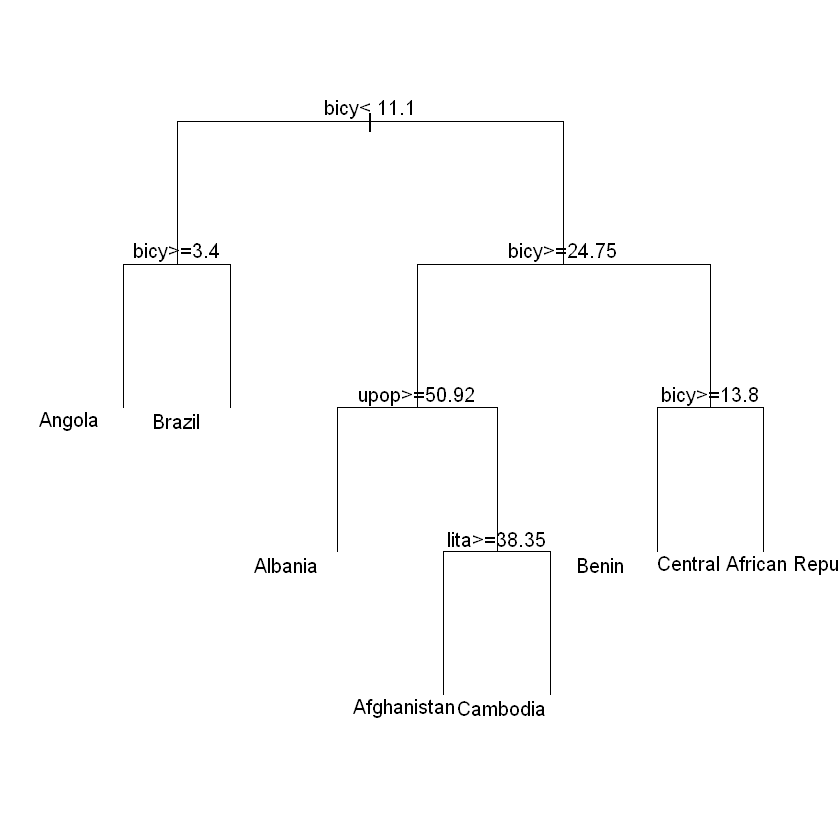

In [144]:
model <- rpart(Country ~., data = df.exp)
par(xpd = NA) # otherwise on some devices the text is clipped
plot(model)
text(model, digits = 3)

The different rules in tree can be printed as follow:

In [145]:
print(model, digits = 2)

n= 78 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 78 77 Afghanistan (0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013)  
   2) bicy< 11 25 24 Angola (0 0 0.04 0.04 0.04 0 0 0 0.04 0 0 0 0.04 0 0 0 0.04 0.04 0 0 0.04 0.04 0.04 0.04 0.04 0.04 0 0 0 0 0 0.04 0 0 0 0.04 0 0 0 0.04 0.04 0 0 0 0 0.04 0 0 0 0 0 0 0 0.04 0 0 0.04 0.04 0 0 0 0 0 0.04 0.04 0 0 0 0 0.04 0 0 0 0 0 0.04 0 0)  
     4) bicy>=3.4 16 15 Angola (0 0 0.062 0.062 0.062 0 0 0 0 0 0 0 0.062 0 0 0 0.062 0.062 0 0 0 0.062 0.062 0.062 0 0.062 0 0 0 0 0 0.062 0 0 0 0 0 0 0 0 0 0 0 

These rules are produced by repeatedly splitting the predictor variables, starting with the variable that has the highest association with the response variable. The process continues until some predetermined stopping criteria are met.

# Example of data set

In [146]:
# Inspect the data
sample_n(df.exp, 3)
# Split the data into training and test set
set.seed(123)
training.samples <- df.exp$clusters %>% 
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- df.exp[training.samples, ]
test.data <- df.exp[-training.samples, ]




Country,bicy,acar,mcyc,pcar,boat,wigc,clusters,cgdp,tpop,upop,popd,land,lita,lity,mori
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
South Africa,7.8,1.1,2.4,28.7,0.6,0.2,2,368288939768,57779622,66.355,47.63012,1213090,0.00000,0.0000,35.0
Niger,8.6,21.5,10.9,2.0,0.0,0.5,1,12846952857,22442948,16.425,17.71765,1266700,35.05000,0.6963,83.4
Comoros,5.1,0.4,5.5,11.5,1.0,0.2,2,1178530758,832322,28.965,447.24448,1861,58.81702,1.0008,65.1


Fully grown trees
Here, we’ll create a fully grown tree showing all predictor variables in the data set.


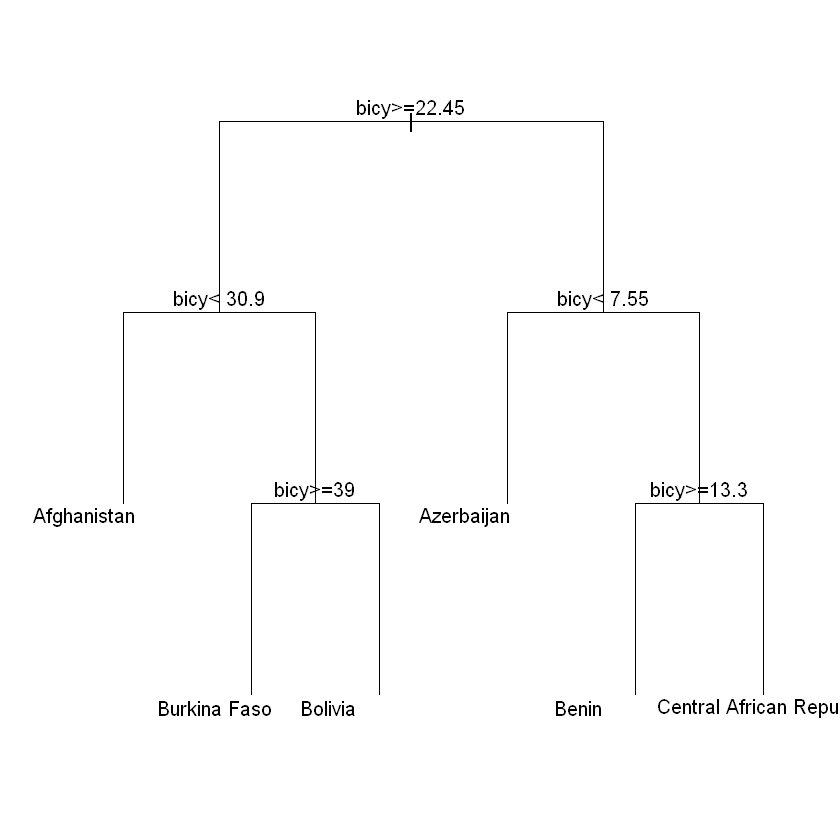

In [147]:
# Build the model
set.seed(123)
model1 <- rpart(Country ~., data = train.data, method = "class")
# Plot the trees
par(xpd = NA) # Avoid clipping the text in some device
plot(model1)
text(model1, digits = 3)

In [148]:
# Make predictions on the test data
predicted.classes <- model1 %>% 
  predict(test.data, type = "class")
head(predicted.classes)

3                        4                       13 
              Azerbaijan Central African Republic Central African Republic 
                      18                       22                       24 
              Azerbaijan               Azerbaijan Central African Republic 
63 Levels: Afghanistan Albania Azerbaijan Bangladesh Benin Bolivia ... Zimbabwe

In [149]:
# Compute model accuracy rate on test data
mean(predicted.classes == test.data$Country)
# Zero is not good, something went wrong, ask the professor for help potentially. 

[1] 0

# Pruning the tree

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


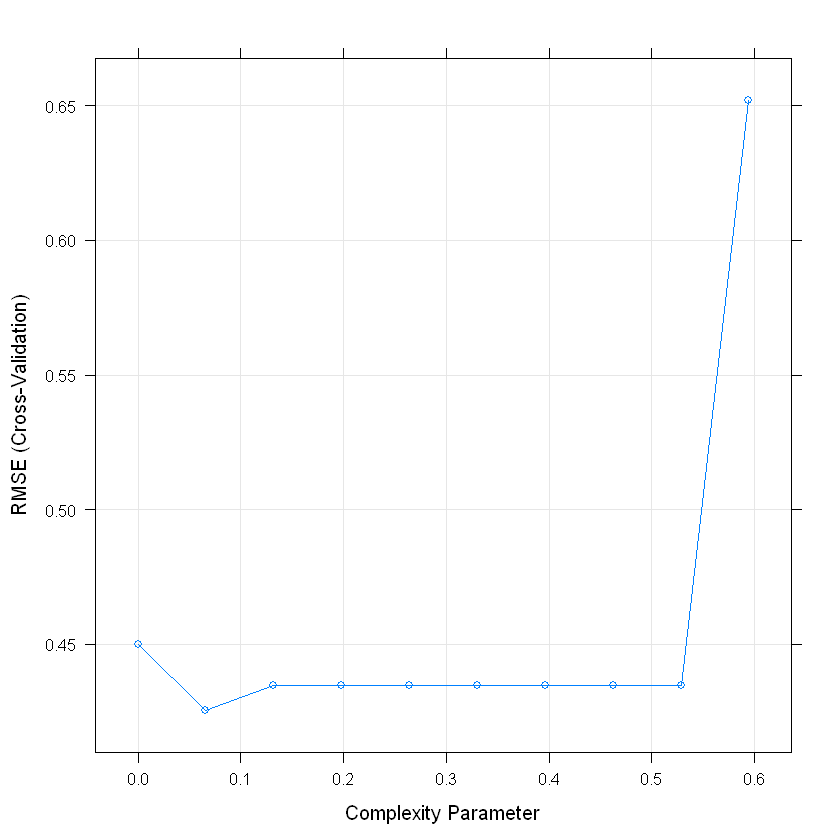

In [150]:
# Fit the model on the training set
set.seed(123)
model2 <- train(
  clusters ~., data = train.data, method = "rpart",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
  )
# Plot model accuracy vs different values of
# cp (complexity parameter)
plot(model2)

RMSE is computed as RMSE = mean((observeds - predicteds)^2) %>% sqrt(). The lower the RMSE, the better the model.

In [151]:
# Print the best tuning parameter cp that
# maximizes the model accuracy
model2$bestTune

,cp
,<dbl>
2,0.0660509


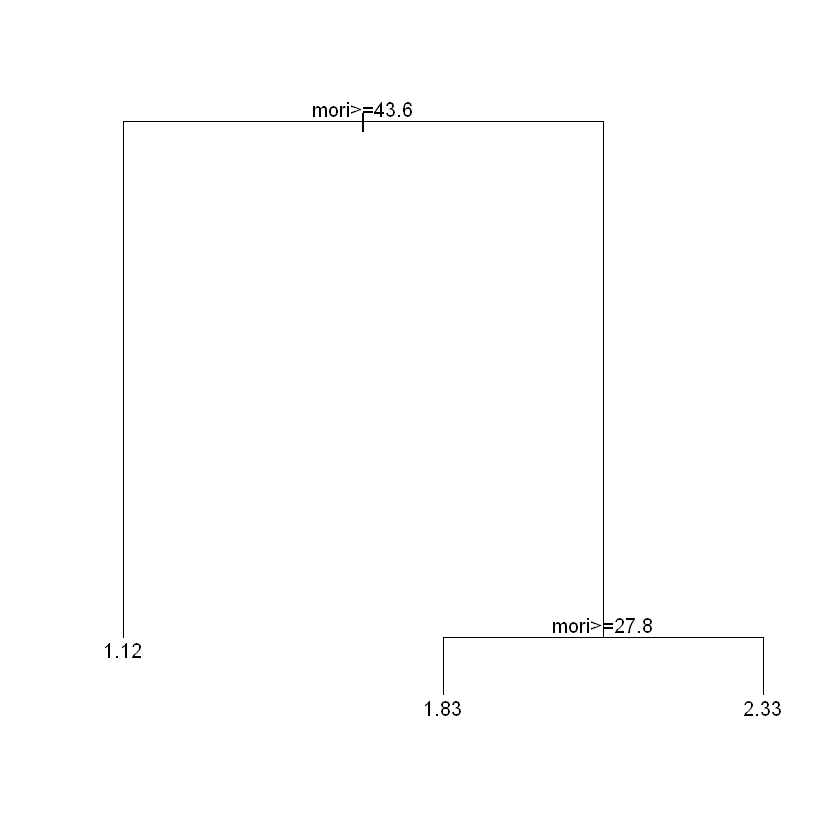

In [152]:
# Plot the final tree model
par(xpd = NA) # Avoid clipping the text in some device
plot(model2$finalModel)
text(model2$finalModel,  digits = 3)

In [153]:
# Decision rules in the model
model2$finalModel

n= 63 

node), split, n, deviance, yval
      * denotes terminal node

1) root 63 27.079370 1.603175  
  2) mori>=43.6 33  3.515152 1.121212 *
  3) mori< 43.6 30  7.466667 2.133333  
    6) mori>=27.8 12  1.666667 1.833333 *
    7) mori< 27.8 18  4.000000 2.333333 *

# Make predictions on the test data
predicted.classes <- model2 %>% predict(test.data)
# Compute model accuracy rate on test data
mean(predicted.classes == test.data$Country)
# Must understand what these function of codes actually implment. 

# Create the regression tree

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


,cp
,<dbl>
3,0.07382981


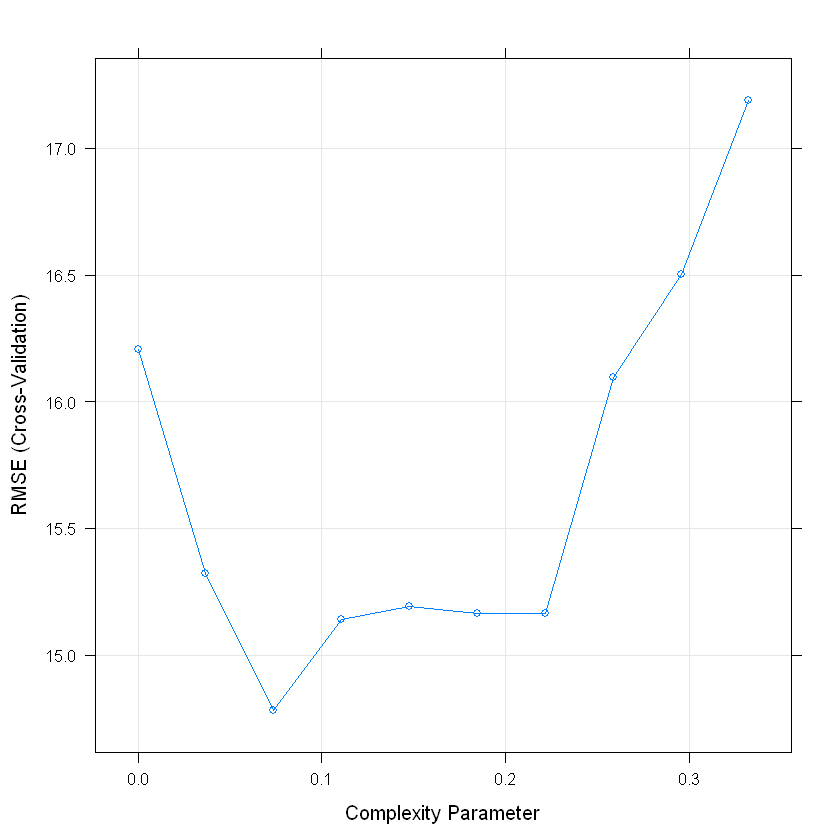

In [154]:
# Fit the model on the training set
set.seed(123)
model <- train(
  bicy ~., data = train.data, method = "rpart",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
  )
# Plot model error vs different values of
# cp (complexity parameter)
plot(model)
# Print the best tuning parameter cp that
# minimize the model RMSE
model$bestTune

Here, the best cp value is the one that minimize the prediction error RMSE (root mean squared error).

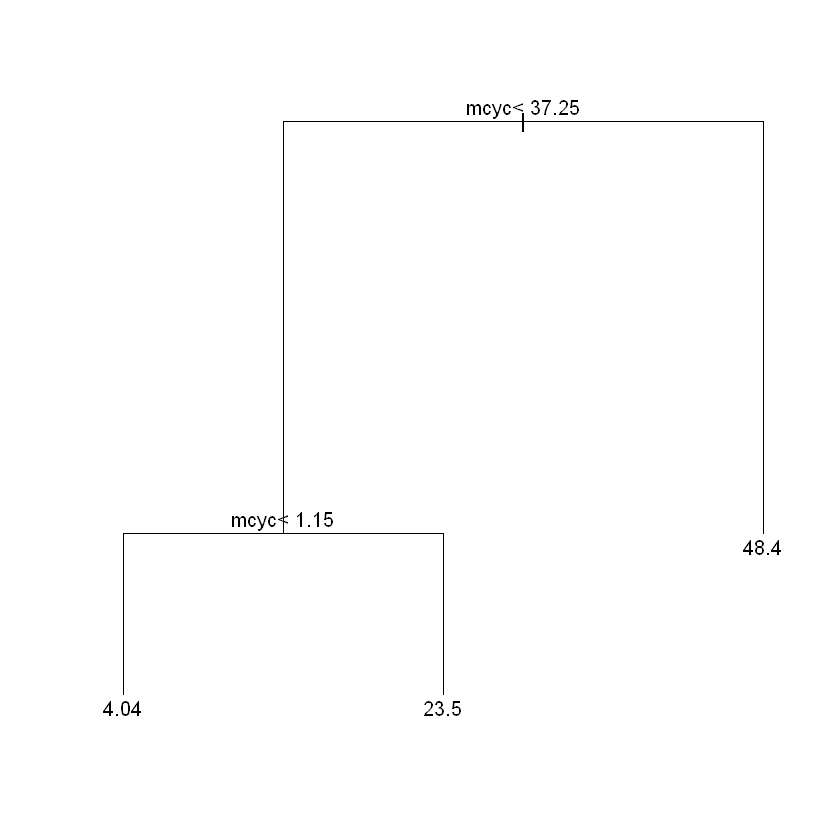

In [155]:
# Plot the final tree model
par(xpd = NA) # Avoid clipping the text in some device
plot(model$finalModel)
text(model$finalModel, digits = 3)

# Decision rules in the model
model$finalModel
# Make predictions on the test data
predictions <- model %>% predict(test.data)
head(predictions)
# Compute the prediction error RMSE
RMSE(predictions, test.data$Country)

# Conditionnal inference tree

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


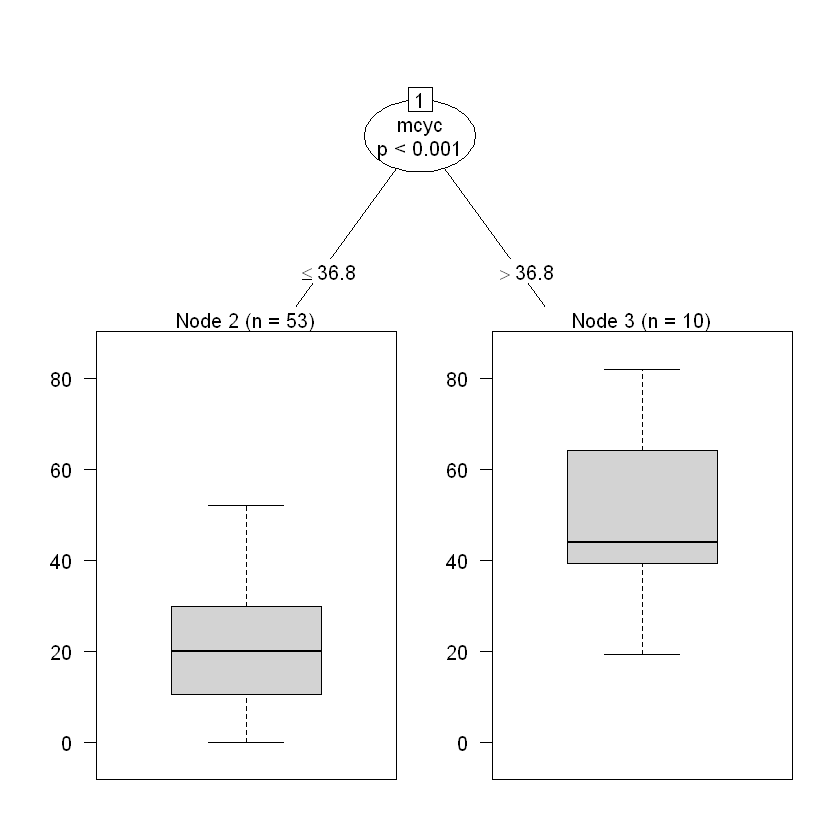

In [156]:
set.seed(123)
model <- train(
  bicy ~., data = train.data, method = "ctree2",
  trControl = trainControl("cv", number = 10),
  tuneGrid = expand.grid(maxdepth = 3, mincriterion = 0.95 )
  )
plot(model$finalModel)

Reference: http://www.sthda.com/english/articles/35-statistical-machine-learning-essentials/141-cart-model-decision-tree-essentials/

# Fitting Classification Trees

Reference: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/6009dd9fa7bc363aa822d2c7/1611259312432/ISLR+Seventh+Printing.pdf (338)
https://www.datacamp.com/community/tutorials/decision-trees-R
Random Forest:
https://cran.r-project.org/web/packages/randomForest/randomForest.pdf

In [157]:
names(df.exp)

[1] "Country"  "bicy"     "acar"     "mcyc"     "pcar"     "boat"    
 [7] "wigc"     "clusters" "cgdp"     "tpop"     "upop"     "popd"    
[13] "land"     "lita"     "lity"     "mori"

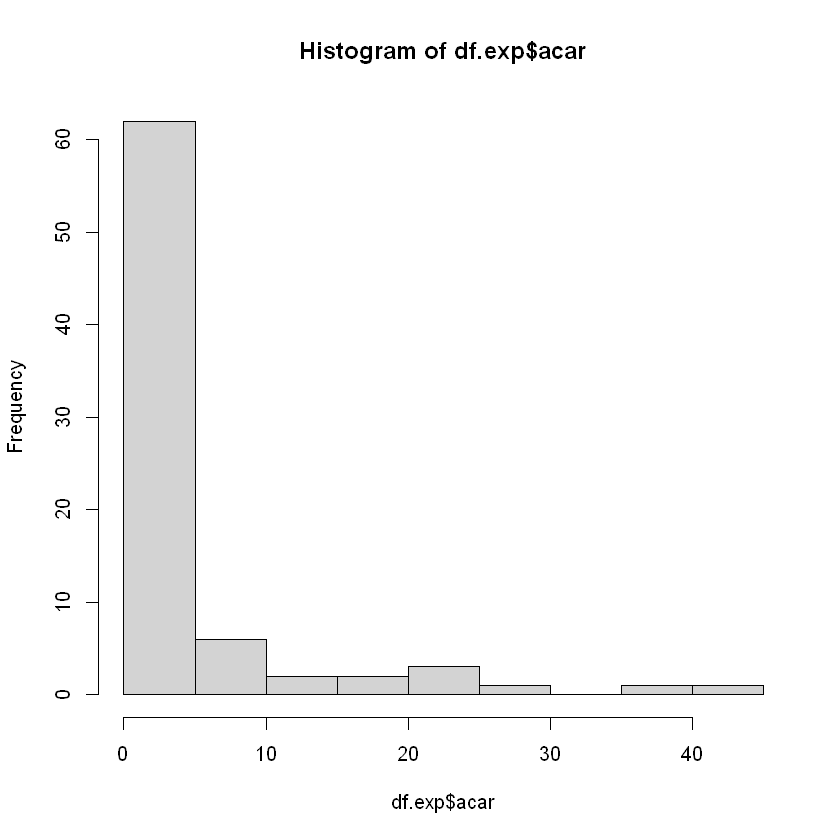

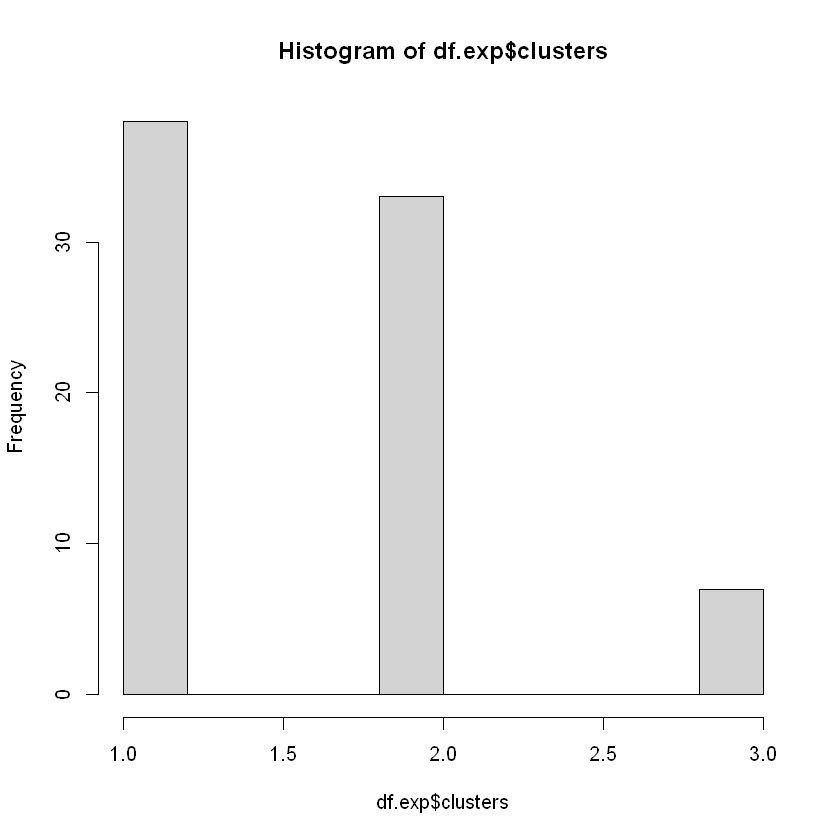

In [158]:
hist(df.exp$acar)
hist(df.exp$clusters)

In [159]:
#High = ifelse(df$acar <= 10 , "No", "Yes")
#df = data.frame(df, High)

In [160]:
tree.wa = tree(clusters ~ . - Country  , data = df.exp)
head(df.exp)
# We must figure out the NAs introduced by coercion meaning before preceeding this sections

,Country,bicy,acar,mcyc,pcar,boat,wigc,clusters,cgdp,tpop,upop,popd,land,lita,lity,mori
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1,1,18353881130,37172386,25.495,56.93776,652860,43.01972,0.75933,62.5
2,Albania,26.4,3.2,9.6,37.0,0.7,0.1,2,15147020535,2866376,60.319,104.61226,27400,98.14115,1.00582,9.5
3,Angola,4.6,1.3,17.8,10.9,0.4,0.3,1,101353230785,30809762,65.514,24.71305,1246700,0.00000,0.00000,77.7
4,Armenia,8.6,0.4,0.2,39.2,0.3,0.1,2,12457941907,2951776,63.149,103.68022,28470,0.00000,0.00000,12.4
5,Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0,2,47112941176,9939771,55.680,120.23432,82670,0.00000,0.00000,21.6
6,Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3,2,274039092455,161356039,36.632,1239.57931,130170,73.91220,1.03276,32.3


In [161]:
summary(tree.wa)


Regression tree:
tree(formula = clusters ~ . - Country, data = df.exp)
Variables actually used in tree construction:
[1] "mori" "cgdp" "wigc" "tpop" "boat"
Number of terminal nodes:  6 
Residual mean deviance:  0.1139 = 8.201 / 72 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.80000 -0.05882 -0.03226  0.00000 -0.03226  0.96770 

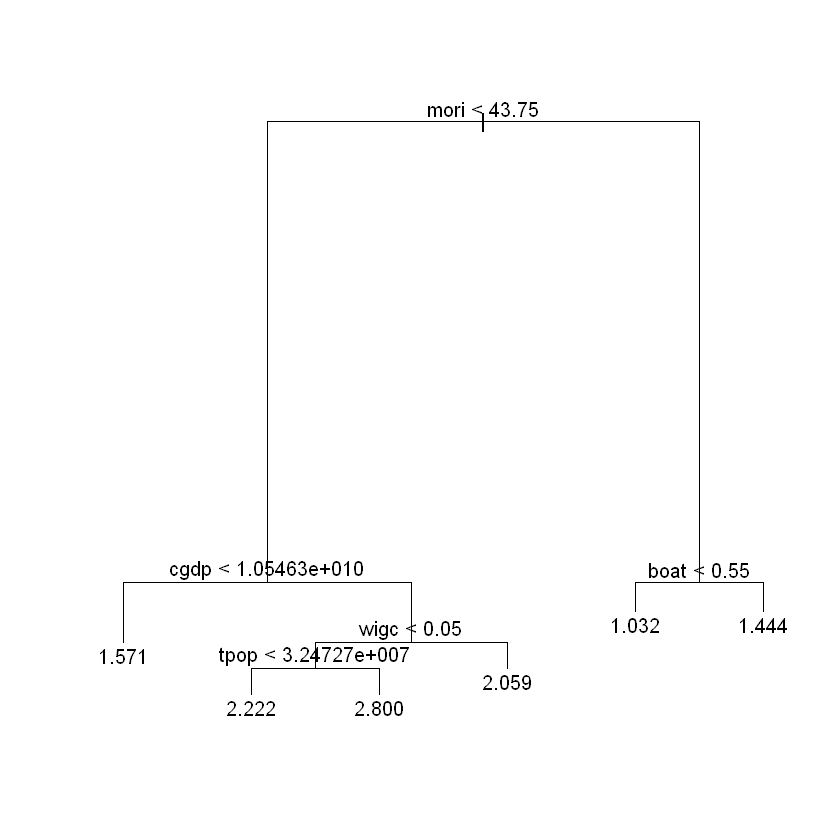

In [162]:
plot(tree.wa)
text(tree.wa, pretty = 0)

In [163]:
tree.wa

node), split, n, deviance, yval
      * denotes terminal node

 1) root 78 32.6800 1.603  
   2) mori < 43.75 38  9.5790 2.105  
     4) cgdp < 1.05463e+010 7  1.7140 1.571 *
     5) cgdp > 1.05463e+010 31  5.4190 2.226  
      10) wigc < 0.05 14  3.4290 2.429  
        20) tpop < 3.24727e+007 9  1.5560 2.222 *
        21) tpop > 3.24727e+007 5  0.8000 2.800 *
      11) wigc > 0.05 17  0.9412 2.059 *
   3) mori > 43.75 40  4.3750 1.125  
     6) boat < 0.55 31  0.9677 1.032 *
     7) boat > 0.55 9  2.2220 1.444 *

Training Session

In [164]:
set.seed(101)
train=sample(1:nrow(df.exp), 59)

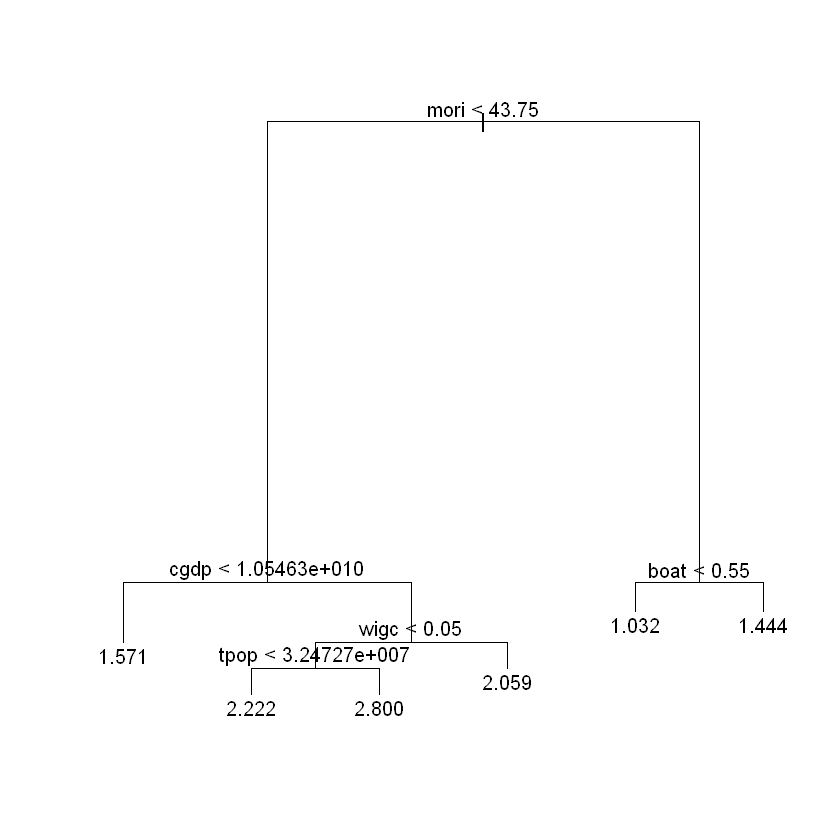

In [165]:
tree.wa = tree(clusters ~ . - Country  , data = df.exp)
plot(tree.wa)
text(tree.wa, pretty=0)

tree.pred = predict(tree.wa, df.exp[-train,], type="class")

Finally, we use the data.frame() function to merge High with the rest of
the borehole (bore) data.

# define function that reruns factor() for the right columns
rerun_factor <- function(x) {
  if (is.factor(x)) return(factor(x))
  return(x)
}

# run on all columns of your data
df <- as.data.frame(lapply(df, rerun_factor))

set.seed(2)
train=sample(1:nrow(df.exp), 78)
df.test= df.exp[-train,]
High.test= df.exp$clusters[-train]
tree.df =tree(clusters ~ . - Country ,df.exp,subset=train)
summary(tree.df)
tree.pred=predict(tree.df,df.test,type="class")
table(tree.pred,High.test)
plot(tree.df)
# Unsure what trees cannot handle multiple responses mean

# Random Forest

To prepare data for random forest, let's set the seed and create a sample training set of 300 observations.

In [179]:
set.seed(101)
train = sample(1:nrow(df.exp), 78)
head(train)

[1] 73 57 46 58 61 60

In [178]:

rf.water = randomForest(acar~., data = df.exp, subset = train)
rf.water


Call:
 randomForest(formula = acar ~ ., data = df.exp, subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 63.47896
                    % Var explained: 5.99

In [184]:
oob.err = double(13)
test.err = double(13)
for(mtry in 1:13){
  fit = randomForest(acar~., data = df.exp, subset=train, mtry=mtry, ntree = 350)
  oob.err[mtry] = fit$mse[350]
  pred = predict(fit, df.exp[-train,])
  test.err[mtry] = with(df.exp[-train,], mean( (acar-pred)^2 ))
}

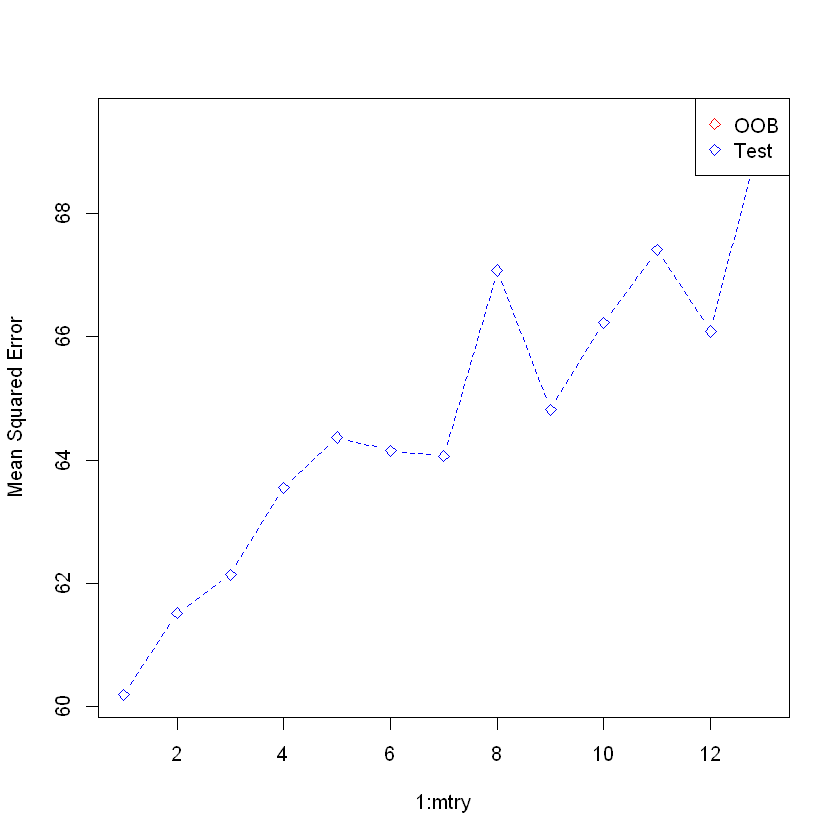

In [185]:
matplot(1:mtry, cbind(test.err, oob.err), pch = 23, col = c("red", "blue"), type = "b", ylab="Mean Squared Error")
legend("topright", legend = c("OOB", "Test"), pch = 23, col = c("red", "blue"))

Printing out the random forest gives its summary: the # of trees (500 were grown), the mean squared residuals (MSR), and the percentage of variance explained. The MSR and % variance explained are based on the out-of-bag estimates, a very clever device in random forests to get honest error estimates.